## QUESTION ONE

# ASCERTAIN DATA QUALITY BEFORE SURVEY RESUMES
 ANALYZING THE SURVEY DATASETS

In [150]:
# Importing the necessary libraries to work with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
# Read the student scores data
df_students = pd.read_csv(r"C:\Users\Emmanuel\OneDrive\Desktop\Data Analytics & Data Science Projects\Survey Data Quality Monitoring\student_scores.csv")
df_schools = pd.read_csv(r"C:\Users\Emmanuel\OneDrive\Desktop\Data Analytics & Data Science Projects\Survey Data Quality Monitoring\school_sample.csv")
# Since backslashes (\) in python file paths are interpreted as escape characters, we use  a raw string by adding an r before the string o treat the backslashes as literal characters

In [152]:
# Displaying the first few rows
df_students.head()

,survey_date,enumerator_id,district,district_id,school_name,school_id,child_id,student_name,age,gender,student_grade,school_meal_subsidy,school_meal_subsidy_otherspec,subsidy_start_date,eg_math_score,eg_reading_score,survey_duration
0,2024-09-24,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,1.0,STUDENT | TQP CU,6,MALE,2,FULLY SUBSIDISED MEALS,NaN,NaN,80,83,37
1,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,2.0,STUDENT | QAY VT,7,Male,2,Other (Specify),Partially subsidised,NaN,57,80,42
2,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,3.0,STUDENT | AKI DG,7,female,2,NO SUBSIDY,NaN,NaN,58,64,45
3,2024-09-24,ENUMERATOR #0,Monduli,4,Uhuru Primary,4088,4.0,STUDENT | PPE ZC,8,Male,2,Other (Specify),Partially subsidised,NaN,56,79,53
4,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,5.0,STUDENT | VLQ EP,7,female,2,NO SUBSIDY,NaN,NaN,54,59,36


In [153]:
# Displaying the first few rows
df_schools.head()

,school_id,school_name,district,district_id,study_arm
0,101,azimio primary,Arusha,1.0,Treatment
1,102,bahati primary,Arusha,1.0,Control
2,103,chekechea primary,Arusha,1.0,Treatment
3,104,furaha primary,Arusha,1.0,Control
4,105,kazi primary,Arusha,1.0,Control


In [154]:
# Basic Data Quality Checks.
print('1. Basic Dataset Information:')
print('Number of rows:', len(df_students))
print('Number of columns:', len(df_students.columns))

1. Basic Dataset Information:
Number of rows: 300
Number of columns: 17


In [155]:
# Get Column names
print(df_students.columns)

Index(['survey_date', 'enumerator_id', 'district', 'district_id',
       'school_name', 'school_id', 'child_id', 'student_name', 'age', 'gender',
       'student_grade', 'school_meal_subsidy', 'school_meal_subsidy_otherspec',
       'subsidy_start_date', 'eg_math_score', 'eg_reading_score',
       'survey_duration'],
      dtype='object')


From the values in the gender column, there appears to be gender inconsistent formatting issues
This is a major data quality issue as;
 1. It can lead to inaccuracies in data analysis and interpretation. It makes it difficult to accurately count or categorize respondents based on gender.
 2. Potential for Bias: If these inconsistencies are not addressed, they can introduce bias into analyses where gender is a significant factor, such as in stratified sampling or subgroup analyses.
 3. Analytical Challenges: When performing analyses (e.g., calculating means, running regression models), inconsistent values can lead to incorrect aggregations. For example, treating 'MALE' and 'male' as different categories will skew results.
 4. Impact on Report and Insights: In reports, gender distributions or insights derived from the data may be misleading if these inconsistencies are not corrected. This can lead to erroneous conclusions and potentially impact decision-making.
                                      Recommendations
1. Standardization: Convert all gender entries to a standardized format (e.g., all lowercase or all uppercase) and define a consistent naming convention (e.g., 'male' and 'female').

2. Data Validation: Implement validation rules during data collection to restrict entries to predefined categories. This can include using dropdowns or radio buttons rather than free text entry.Restric entrie in the CAPI software. 

In [160]:
print(df_students['district'].unique())
 
# Our survey covers five districts. As for the two days covered, we can assume only two districts have been covered

['Ngorongoro' 'Monduli']


In [161]:
# Checking for missing values in columns
print(df_students.isnull().sum())

survey_date                        0
enumerator_id                      0
district                           0
district_id                        0
school_name                        0
school_id                          0
child_id                          18
student_name                       0
age                                0
gender                             0
student_grade                      0
school_meal_subsidy                0
school_meal_subsidy_otherspec    280
subsidy_start_date               209
eg_math_score                      0
eg_reading_score                   0
survey_duration                    0
gender_column                      0
dtype: int64


Missing values in the child_id column can lead to 
1. Identification and Tracking challenges- Child IDs are crucial for identifying individual respondents. Missing IDs can make it impossible to track responses back to specific individuals. Also inability to Merge Datasets: If you need to merge data from different sources (e.g., multiple surveys or administrative data), missing IDs can hinder this process, leading to incomplete datasets.

2. Data Integrity & Reliability - Increased Risk of Duplication: Without unique identifiers, there's a higher chance of duplicating entries if individuals are re-surveyed or if their data is collected from different sources.
Potential Bias: If missing IDs are not random and relate to specific groups (e.g., socioeconomic status, demographic factors), this could introduce bias in your findings and affect the overall representativeness of your sample.

3. Limitations in Analysis: Missing data can complicate analyses, especially when conducting subgroup analyses or calculating statistics based on specific child populations. This can lead to incomplete or skewed results.

In [162]:
# Checking age range
df_students['age'].min(), 'to', df_students['age'].max()

(6, 'to', 45)

c:\Users\Emmanuel\anaconda3\envs\Data_science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


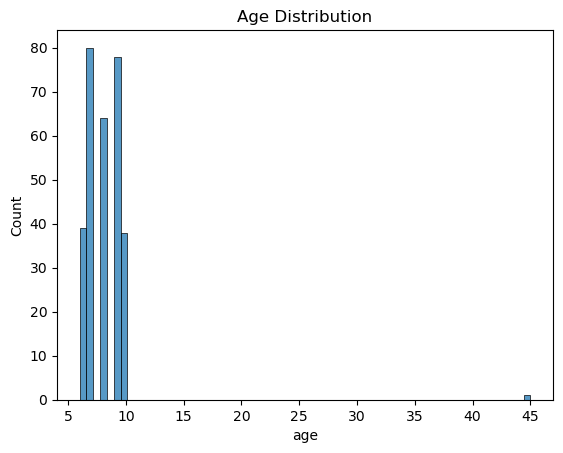

In [163]:
# An age of 45 for grade 2-3 students seems erroneous.
# Plot age distribution
sns.histplot(data=df_students, x='age')
plt.title('Age Distribution')
plt.show()

- Age distribution shows suspicious outliers (45 years old in student data).
Anomalous values like these can skew calculations, especially in a smaller dataset, by distorting means, medians, and other statistical measures.
Erroneous data points can introduce bias in models, especially if age is used as a predictor variable in regressions or other analyses. Misleading age profiles could affect the generalizability of the results.
Reporting an inflated average age or including outliers in age distributions could misinform stakeholders, especially if this impacts programmatic decisions for interventions targeting young students.

Best Practices to address such include
1.  Use data validation rules in the CAPI software to restrict age entries to a realistic range for the target population, preventing future data entry errors.
2. Identify and remove or correct unrealistic age values. For instance, you could set a reasonable range for age (e.g., 5–12 years) and flag any values outside this range for further review.

In [164]:
# Checking Key Statistics 
# Survey Duration
print('Average survey duration:', round(df_students['survey_duration'].mean(), 2), 'minutes')
print('Surveys under 20 minutes:', len(df_students[df_students['survey_duration'] < 20]))
print('Surveys over 60 minutes:', len(df_students[df_students['survey_duration'] > 60]))

Average survey duration: 43.95 minutes
Surveys under 20 minutes: 2
Surveys over 60 minutes: 0


- From the survey duration statistics generated above, two surveys lasted two minutes. For this, if these responses show clear signs of rushing (like missing data or minimal answers), we might consider flagging them as outliers. This would allow for testing analyses with and without these responses to assess their impact on overall results.However, the fact that most respondents completed the survey between 20 and 60 minutes across both days suggests consistency in survey completion time. This stability can be a positive indicator of data collection quality, especially if the survey setup, respondent demographics, or content complexity remained unchanged.

In [165]:
# Displaying the first few rows of the schools dataset
df_schools.head()

,school_id,school_name,district,district_id,study_arm
0,101,azimio primary,Arusha,1.0,Treatment
1,102,bahati primary,Arusha,1.0,Control
2,103,chekechea primary,Arusha,1.0,Treatment
3,104,furaha primary,Arusha,1.0,Control
4,105,kazi primary,Arusha,1.0,Control


In [166]:
# Checking for missing values in df_schools dataset
print(df_schools.isnull().sum())

school_id      0
school_name    0
district       5
district_id    6
study_arm      0
dtype: int64


The missing values in district and district_id in your school dataset could impact survey analysis in the following ways
1. Grouping and Comparative Analysis: Inability to Group by District - This can hinder  ability to group or compare data by district, which is often essential for understanding regional variations, resource allocation, or intervention effects.
Distorted Group Statistics- If a district has missing values, the statistics calculated for each district (e.g., average scores or enrollment figures) will be incomplete or potentially biased, which may lead to misleading insights when comparing districts.

2. Sampling and Representation: Sample Balance Issues - Missing district or district_id values can affect sample balance if certain districts end up underrepresented. This can reduce the validity of regional comparisons and limit the generalizability of findings across districts.

3. Difficulty with Data Merging and Linking: Challenges in Merging Datasets:  for other datasets that need to be linked by district or district_id, these missing values will prevent successful merging for certain schools. This can result in data loss, where records for these schools are excluded from merged datasets, leading to incomplete analyses.


Best Recommendation for this 
1. Investigate the Source of Missing Data: If possible, understand why certain schools lack district data, as this could indicate a pattern (e.g., data entry errors) that might be correctable.

2. Conduct Sensitivity Analysis: Run your analysis with and without these schools to see if their inclusion affects results, especially if district comparisons are central to your findings.

## QUESTION TWO

# PRELIMINARY ANALYSIS ON ATTRITION RATES AND SAMPLE BALANCE

Attrition rate, is a metric used to measure the rate at which participants (such as students, employees, or customers) leave a study, organization, or program over a specific period. In the context of our analysis looking at student attrition in a study or educational setting, the attrition rate can give insights into the retention of students in treatment and control groups.

- Monitoring attrition rates is essential in survey and longitudinal studies because high or unbalanced attrition can undermine the validity of results and introduce bias. Here’s why calculating and managing attrition rate is crucial:

- Assessing Data Completeness: Attrition rates give insight into how much data remains usable over time, particularly in studies that involve repeated measurements or long-term follow-ups. High attrition may lead to incomplete data, which can weaken the reliability of conclusions.

- Identifying Potential Bias: If certain types of participants (e.g., lower-scoring or high-risk individuals) are more likely to leave the study, this can skew results, as the remaining sample may no longer be representative of the population. Calculating attrition rates by group (e.g., treatment vs. control) helps detect such imbalances.

- Maintaining Study Validity: For studies where results depend on comparing groups over time, like randomized controlled trials, a balanced and low attrition rate across groups is vital to avoid invalidating findings due to unrepresentative remaining samples.

Sample balance refers to the distribution and representativeness of key characteristics across different groups within a study sample. It is crucial in ensuring that comparison groups, such as treatment and control groups, are similar in relevant aspects except for the intervention being studied. Calculating sample balance is essential for achieving credible, unbiased results and for validating the fairness of comparisons. Here’s a breakdown of its purpose and how it’s assessed:

- Reduce Bias: Balanced samples reduce selection bias, which can otherwise lead to misleading conclusions. For example, if a treatment group has more students with higher baseline academic performance than the control group, any observed improvements might be due to this initial difference rather than the treatment effect.

- Enhance Comparability: A well-balanced sample ensures that differences in outcomes can be more reliably attributed to the intervention rather than pre-existing differences. This is particularly important in randomized controlled trials (RCTs) and observational studies.

- Support Generalizability: Balanced samples increase the likelihood that findings are applicable beyond the study group, making results more broadly useful for informing policies or scaling interventions.

In [167]:
# Checking for columns in schools dataset
print(df_combined.columns)

Index(['survey_date', 'enumerator_id', 'district_x', 'district_id_x',
       'school_name_x', 'school_id', 'child_id', 'student_name', 'age',
       'gender', 'student_grade', 'school_meal_subsidy',
       'school_meal_subsidy_otherspec', 'subsidy_start_date', 'eg_math_score',
       'eg_reading_score', 'survey_duration', 'gender_column', 'school_name_y',
       'district_y', 'district_id_y', 'study_arm'],
      dtype='object')


In [168]:
# Merge the two datasets on the common column
df_combined = pd.merge(df_students, df_schools, on='school_id')

In [169]:
# Printing the first few rows of our new DataFrame
df_combined.head()

,survey_date,enumerator_id,district_x,district_id_x,school_name_x,school_id,child_id,student_name,age,gender,...,school_meal_subsidy_otherspec,subsidy_start_date,eg_math_score,eg_reading_score,survey_duration,gender_column,school_name_y,district_y,district_id_y,study_arm
0,2024-09-24,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,1.0,STUDENT | TQP CU,6,MALE,...,NaN,NaN,80,83,37,Male,mbuyuni primary,Ngorongoro,5.0,Treatment
1,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,2.0,STUDENT | QAY VT,7,Male,...,Partially subsidised,NaN,57,80,42,Male,mbuyuni primary,Ngorongoro,5.0,Treatment
2,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,3.0,STUDENT | AKI DG,7,female,...,NaN,NaN,58,64,45,Female,mbuyuni primary,Ngorongoro,5.0,Treatment
3,2024-09-23,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,5.0,STUDENT | VLQ EP,7,female,...,NaN,NaN,54,59,36,Female,mbuyuni primary,Ngorongoro,5.0,Treatment
4,2024-09-24,ENUMERATOR #0,Ngorongoro,5,Mbuyuni Primary,505,7.0,STUDENT | EML OA,7,female,...,NaN,NaN,69,49,44,Female,mbuyuni primary,Ngorongoro,5.0,Treatment


In [170]:
# Columns in our new DataFrame
print(df_combined.columns)

Index(['survey_date', 'enumerator_id', 'district_x', 'district_id_x',
       'school_name_x', 'school_id', 'child_id', 'student_name', 'age',
       'gender', 'student_grade', 'school_meal_subsidy',
       'school_meal_subsidy_otherspec', 'subsidy_start_date', 'eg_math_score',
       'eg_reading_score', 'survey_duration', 'gender_column', 'school_name_y',
       'district_y', 'district_id_y', 'study_arm'],
      dtype='object')


In [171]:
# Calculate mean age, math, and english scores for each group
group_means = df_combined.groupby('study_arm').agg(
    mean_age=('age', 'mean'),
    mean_math_score=('eg_math_score', 'mean'),
    mean_english_score=('eg_reading_score', 'mean')
).reset_index()
print(group_means)

   study_arm  mean_age  mean_math_score  mean_english_score
0    Control  9.171429        57.828571           67.942857
1  Treatment  7.983425        59.773481           68.812155


In [184]:
# Create a mapping dictionary for gender standardization
gender_mapping = {
    'male': 'Male',
    'female': 'Female',
    'f emale': 'Female',
    'm male': 'Male',
     'MALE':'Male',
     'FEMALE':'Female',
     'F emale':'Female',
     'M male': 'Male'
    # Add any other variations you might find
}

# Replace values in the DataFrame using the mapping
df_combined['gender'] = df_combined['gender'].replace(gender_mapping)

In [186]:
# Check unique values again after standardization
gender= df_combined['gender'].unique()
print(gender)

['Male' 'Female']


In [196]:
gender_ratio = df_combined['gender'].value_counts(normalize=True)
print(gender_ratio)

gender
Female    0.583333
Male      0.416667
Name: proportion, dtype: float64


From the above generated statistics, 
- The means of age are close, suggesting that any observed differences in outcomes (math and english scores) are less likely due to age.

- The average math and english scores indicate the academic performance level of each group at baseline or during the study period. The close similar means suggest the groups started at a comparable academic level, supporting the validity of comparisons.

- Approximately 58.33% of the entries in your dataset are labeled as Female. This is a majority representation, suggesting that there are more females than males in your dataset.Conversely, 41.67% of the entries are labeled as Male. This indicates a slightly lower representation of males compared to females.

# Implication of the results

- Sample Composition:

The data shows that the sample has a higher proportion of females. Understanding the gender distribution is crucial for assessing whether your sample is representative of the broader population you are studying.

- Potential Bias:

If your analysis or interventions are sensitive to gender differences, a significant imbalance could introduce bias. For example, if the intervention or survey results differ significantly by gender, this could skew your findings.
Further Analysis:

You might want to consider conducting additional analyses to explore whether there are any differences in outcomes (e.g., test scores) based on gender. This could help determine if the treatment or control conditions have differential effects by gender.

- Contextual Relevance:

Since this is an educational study, it may also be relevant to understand the reasons behind the gender distribution. Are there more female students in the schools being studied? Are there external factors contributing to this imbalance?

In [191]:
# 4. Calculate sample sizes for each group
sample_sizes = df_combined.groupby('study_arm').size().reset_index(name='sample_size')
print(sample_sizes)

   study_arm  sample_size
0    Control           35
1  Treatment          181


# Interpretation of Sample Sizes

Control Group:

- Sample Size = 35: This means there are 35 participants in the Control group. This is a relatively small sample size and may limit the statistical power of any analyses conducted on this group.

Treatment Group:

- Sample Size = 181: The Treatment group has 181 participants, which is a much larger sample. This larger size can provide more robust statistical power for detecting effects and trends.

# Implications of Sample Size Differences

Statistical Power:

The larger sample size in the Treatment group may increase the ability to detect significant effects or differences compared to the Control group. Small sample sizes can lead to Type II errors, where true effects are missed.

Generalizability:

The findings from the Control group may be less generalizable due to the smaller sample size. This could be particularly important if the Control group shows different characteristics or responses compared to the Treatment group.

Balance and Comparison:

The significant disparity in sample sizes (35 vs. 181) raises concerns about balance. It may lead to biased estimates of treatment effects, as differences in characteristics between the groups could be more pronounced due to the unequal sizes.

Next Steps

Analysis:

You might want to conduct analyses to compare characteristics (like age, gender, scores) between the two groups to understand if the groups are comparable despite the size difference.

Statistical Tests:

Use appropriate statistical tests that account for unequal sample sizes, such as t-tests or ANOVA, while interpreting the results cautiously.

Visualization:

Consider visualizing the sample sizes with a bar chart to clearly communicate the differences in participant numbers between the two groups.